## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [2]:
df = pd.read_csv('distance_dataset (1).csv')

# Display the first few rows to confirm
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [7]:
#simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
#simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

# First, create numpy matrices for 2D and 3D coordinates
mat2D = df[['X', 'Y']].to_numpy()
mat3D = df[['X', 'Y', 'Z']].to_numpy()

# Define reference vectors
ref2D = np.array([[5, 5]])
ref3D = np.array([[5, 5, 5]])

# Compute cosine similarity for each row versus the reference point
cosine_sim_2D = cosine_similarity(mat2D, ref2D)
cosine_sim_3D = cosine_similarity(mat3D, ref3D)

simCosine3D = 1. - cosine_sim_3D
simCosine = 1. - cosine_sim_2D

# Convert cosine similarity to a "distance-like" metric (1 - cosine similarity)
df['cosine_dist_2D'] = 1 - cosine_sim_2D
df['cosine_dist_3D'] = 1 - cosine_sim_3D

# Display the updated dataframe
df.head()



,Unnamed: 0,X,Y,Z,ClusterID,cosine_dist_2D,cosine_dist_3D
0,0,5.135779,4.167542,5.787635,4,0.005372,0.008640
1,1,4.280721,5.770909,6.091044,4,0.010812,0.010576
2,2,8.329098,7.540436,3.247239,2,0.001233,0.056269
3,3,5.470224,5.069249,5.768313,4,0.000723,0.001385
4,4,2.381797,2.402374,3.879101,1,0.000009,0.028225


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

In [8]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

<Figure size 1000x800 with 0 Axes>

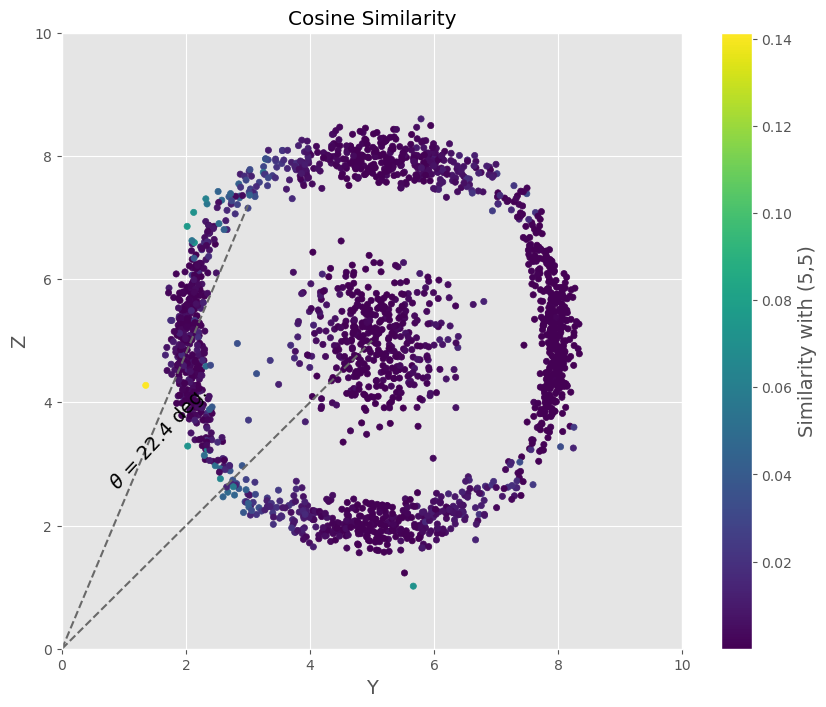

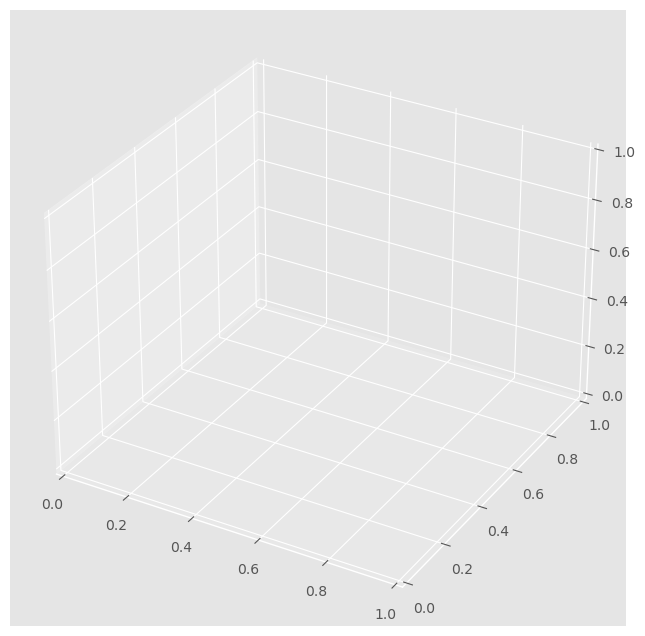

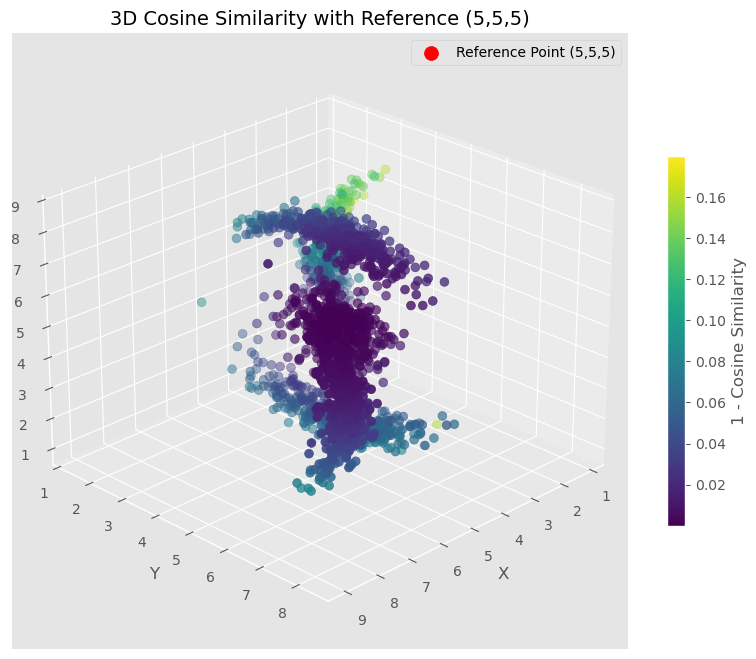

In [10]:
# --- 3D Cosine Similarity Visualization ---
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting

# Create the 3D figure
figCosine3D = plt.figure(figsize=[10, 8])
ax = figCosine3D.add_subplot(111, projection='3d')

# Scatter plot: color represents cosine similarity to (5,5,5)
p = ax.scatter(df['X'], df['Y'], df['Z'], c=simCosine3D[:, 0], s=40, cmap='viridis')

# Plot the reference plane at (5,5,5)
ax.scatter(5, 5, 5, color='red', s=100, label='Reference Point (5,5,5)')

# Axis labels and title
ax.set_xlabel('X', size=12)
ax.set_ylabel('Y', size=12)
ax.set_zlabel('Z', size=12)
ax.set_title('3D Cosine Similarity with Reference (5,5,5)', size=14)

# Color bar for similarity scale
cb = figCosine3D.colorbar(p, ax=ax, shrink=0.6)
cb.set_label('1 - Cosine Similarity', size=12)

# Optional: adjust viewing angle
ax.view_init(elev=25, azim=45)

plt.legend()
plt.show()

# Optional save
# figCosine3D.savefig('similarity-cosine-3D.png')


----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1, Document2]

X_train_counts = count_vect.fit_transform(corpus)

# Changed get_feature_names() to get_feature_names_out() for newer scikit-learn versions
pd.DataFrame(X_train_counts.toarray(), 
             columns=count_vect.get_feature_names_out(),  
             index=['Document 0', 'Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [16]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [22]:
Document1 = "Marvels next epic team-up film is titled Avengers: Doomsday, with the titular villain facing off against heroes from both past and present Marvel stories. Like any Avengers film, the cast is heavily stacked. Alongside Liu's Shang-Chi, we also know that Patrick Stewart and Ian McKellen are among returning X-Men veterans, alongside the return of Robert Downey Jr., now taking on Doctor Doom. Other returning MCU names include Chris Hemsworth, Vanessa Kirby, Anthony Mackie, Sebastian Stan, Letitia Wright, Paul Rudd, and Wyatt Russell."
Document2 = "Avengers: Doomsday will not include one of Fox's X-Men universe mainstay actors, and it's quite unfortunate. The upcoming mega crossover event of the Marvel Cinematic Universe (MCU) is set to finally bring together the Avengers, the Fantastic Four, and the X-Men for the first time as they unite against Robert Downey Jr.'s Doctor Doom. Several actors who played important characters from Fox's X-Men films will join the fight, most notably James Marsden's Cyclops, Patrick Stewart's Charles Xavier, and Ian McKellen's Magneto. "
# Combine into a corpus (a list of documents)
corpus = [Document1, Document2]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [23]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [24]:
df_counts = pd.DataFrame(
    X_counts.toarray(),
    columns=count_vect.get_feature_names_out(),
    index=['Document 0', 'Document 1']
)
print("Count Vectorizer representation:")
display(df_counts)

Count Vectorizer representation:


,actors,against,alongside,also,among,and,anthony,any,are,as,...,vanessa,veterans,villain,we,who,will,with,wright,wyatt,xavier
Document 0,0,1,2,1,1,3,1,1,1,0,...,1,1,1,1,0,0,1,1,1,0
Document 1,2,1,0,0,0,3,0,0,0,1,...,0,0,0,0,1,2,0,0,0,1


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [25]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

# Convert to DataFrame for inspection
df_tfidf = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=['Document 0', 'Document 1']
)
print("\nTF-IDF representation:")
display(df_tfidf)


TF-IDF representation:


,actors,against,alongside,also,among,and,anthony,any,are,as,...,vanessa,veterans,villain,we,who,will,with,wright,wyatt,xavier
Document 0,0.000000,0.077279,0.217226,0.108613,0.108613,0.231838,0.108613,0.108613,0.108613,0.000000,...,0.108613,0.108613,0.108613,0.108613,0.000000,0.000000,0.108613,0.108613,0.108613,0.000000
Document 1,0.197963,0.070426,0.000000,0.000000,0.000000,0.211279,0.000000,0.000000,0.000000,0.098982,...,0.000000,0.000000,0.000000,0.000000,0.098982,0.197963,0.000000,0.000000,0.000000,0.098982


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [26]:
similarity = cosine_similarity(X_tfidf[0:1], X_tfidf)
print("\nCosine Similarity between Document 0 and Document 1:")
print(similarity)


Cosine Similarity between Document 0 and Document 1:
[[1.         0.30477928]]
